In [1]:
import numpy as np 
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns

In [2]:
data = pd.read_csv("ai4i2020.csv")
data.replace("?",np.nan,inplace=True)
for column in data.columns:
    try:
        data[column] = data[column].astype(float)
    except:
        pass
data.drop(['UDI', 'Product ID'],axis=1,inplace=True)
data['Machine failure']=0
data['Machine failure'][data['TWF']==1]=1
data['Machine failure'][data['HDF']==1]=2
data['Machine failure'][data['PWF']==1]=3
data['Machine failure'][data['OSF']==1]=4
data['Machine failure'][data['RNF']==1]=5
data.drop(['TWF','HDF','PWF','OSF','RNF'],axis=1,inplace=True)
data['Power'] = data['Rotational speed [rpm]'] * data['Torque [Nm]']
data['Temperature difference'] = data['Process temperature [K]'] - data['Air temperature [K]']
data = data[[
    'Machine failure',
    'Type',
    'Air temperature [K]',
    'Process temperature [K]',
    'Rotational speed [rpm]',
    'Torque [Nm]',
    'Tool wear [min]',
    'Power',
    'Temperature difference'
]]
data.describe(include='all')
display(data)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_29756\3795189905.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Machine failure'][data['TWF']==1]=1
C:\Users\Administrator\AppData\Local\Temp\ipykernel_29756\3795189905.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Machine failure'][data['HDF']==1]=2
C:\Users\Administrator\AppData\Local\Temp\ipykernel_29756\3795189905.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

Machine failure Type  Air temperature [K]  Process temperature [K]  \
0                   0    M                298.1                    308.6   
1                   0    L                298.2                    308.7   
2                   0    L                298.1                    308.5   
3                   0    L                298.2                    308.6   
4                   0    L                298.2                    308.7   
...               ...  ...                  ...                      ...   
9995                0    M                298.8                    308.4   
9996                0    H                298.9                    308.4   
9997                0    M                299.0                    308.6   
9998                0    H                299.0                    308.7   
9999                0    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]    Power  \
0                     1551.0         42.8              0.0  66382.8   
1                     1408.0         46.3              3.0  65190.4   
2                     1498.0         49.4              5.0  74001.2   
3                     1433.0         39.5              7.0  56603.5   
4                     1408.0         40.0              9.0  56320.0   
...                      ...          ...              ...      ...   
9995                  1604.0         29.5             14.0  47318.0   
9996                  1632.0         31.8             17.0  51897.6   
9997                  1645.0         33.4             22.0  54943.0   
9998                  1408.0         48.5             25.0  68288.0   
9999                  1500.0         40.2             30.0  60300.0   

      Temperature difference  
0                       10.5  
1                       10.5  
2                       10.4  
3                       10.4  
4                       10.5  
...                      ...  
9995                     9.6  
9996                     9.5  
9997                     9.6  
9998                     9.7  
9999                     9.7  

[10000 rows x 9 columns]

In [3]:
data.head()


Machine failure Type  Air temperature [K]  Process temperature [K]  \
0                0    M                298.1                    308.6   
1                0    L                298.2                    308.7   
2                0    L                298.1                    308.5   
3                0    L                298.2                    308.6   
4                0    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]    Power  \
0                  1551.0         42.8              0.0  66382.8   
1                  1408.0         46.3              3.0  65190.4   
2                  1498.0         49.4              5.0  74001.2   
3                  1433.0         39.5              7.0  56603.5   
4                  1408.0         40.0              9.0  56320.0   

   Temperature difference  
0                    10.5  
1                    10.5  
2                    10.4  
3                    10.4  
4                    10.5

In [4]:
data.shape


(10000, 9)

In [5]:
from ydata_profiling import ProfileReport

profile = ProfileReport(data, title="Pandas Profiling Report")


In [6]:
profile


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
data.describe().T


count         mean           std      min      25%  \
Machine failure          10000.0      0.09900      0.561988      0.0      0.0   
Air temperature [K]      10000.0    300.00493      2.000259    295.3    298.3   
Process temperature [K]  10000.0    310.00556      1.483734    305.7    308.8   
Rotational speed [rpm]   10000.0   1538.77610    179.284096   1168.0   1423.0   
Torque [Nm]              10000.0     39.98691      9.968934      3.8     33.2   
Tool wear [min]          10000.0    107.95100     63.654147      0.0     53.0   
Power                    10000.0  59967.14704  10193.093881  10966.8  53105.4   
Temperature difference   10000.0     10.00063      1.001094      7.6      9.3   

                             50%       75%      max  
Machine failure              0.0      0.00      5.0  
Air temperature [K]        300.1    301.50    304.5  
Process temperature [K]    310.1    311.10    313.8  
Rotational speed [rpm]    1503.0   1612.00   2886.0  
Torque [Nm]                 40.1     46.80     76.6  
Tool wear [min]            108.0    162.00    253.0  
Power                    59883.9  66873.75  99980.4  
Temperature difference       9.8     11.00     12.1

In [8]:
data.select_dtypes(include=['object']).describe().T


count unique top  freq
Type  10000      3   L  6000

In [9]:
data.columns


Index(['Machine failure', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Power', 'Temperature difference'],
      dtype='object')

In [10]:
num_cols = ['Air temperature [K]', 'Process temperature [K]',
            'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
cat_cols = ['Type', 'Failure type']
label = 'Machine failure'

In [11]:
data['Air temperature [K]'][data['Air temperature [K]'].isna().astype(int) == 1]


Series([], Name: Air temperature [K], dtype: float64)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

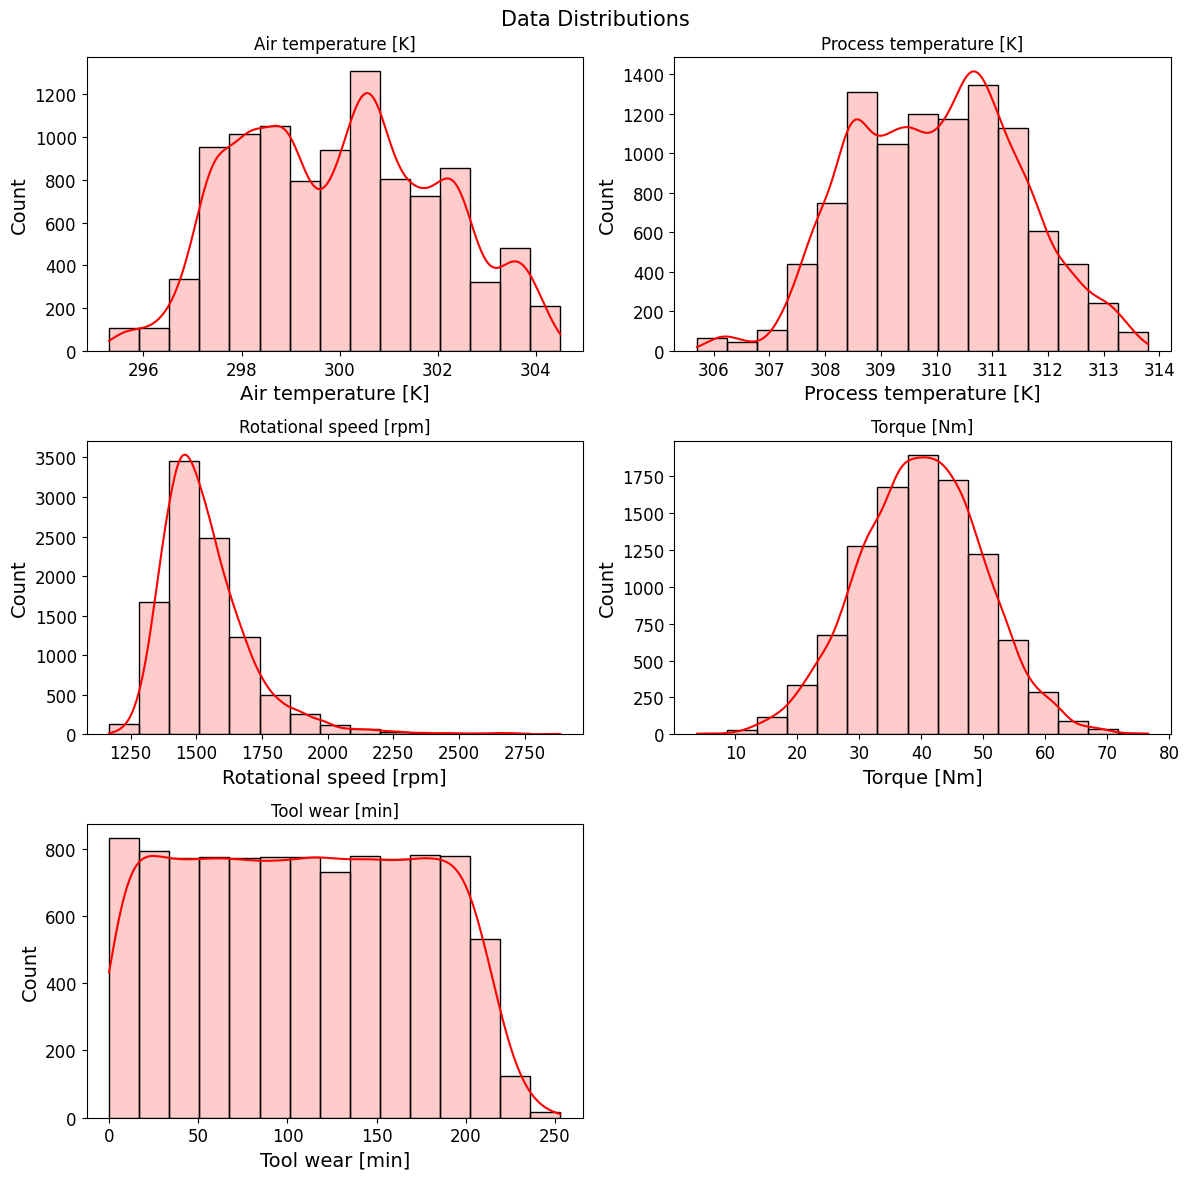

In [12]:
plt.figure(figsize=(12, 12))
for i, col in enumerate(num_cols):
    plt.subplot(3, 2, i+1)
    sns.histplot(data, x=col, kde=True, alpha=0.2, color='red', bins=15)
    plt.title(col)
plt.suptitle("Data Distributions", fontsize=15)
plt.tight_layout()
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

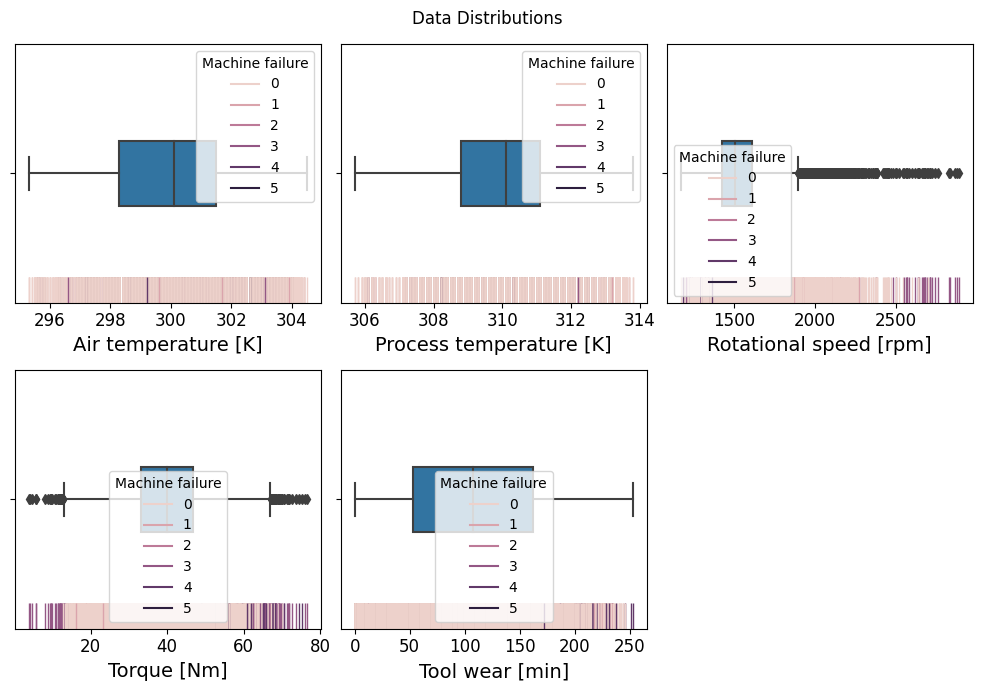

In [13]:
plt.figure(figsize=(10, 7))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.rugplot(data, x=col, hue=label, height=0.1)
    sns.boxplot(data, x=col, width=0.25)
plt.suptitle("Data Distributions")
plt.tight_layout()
plt.show()

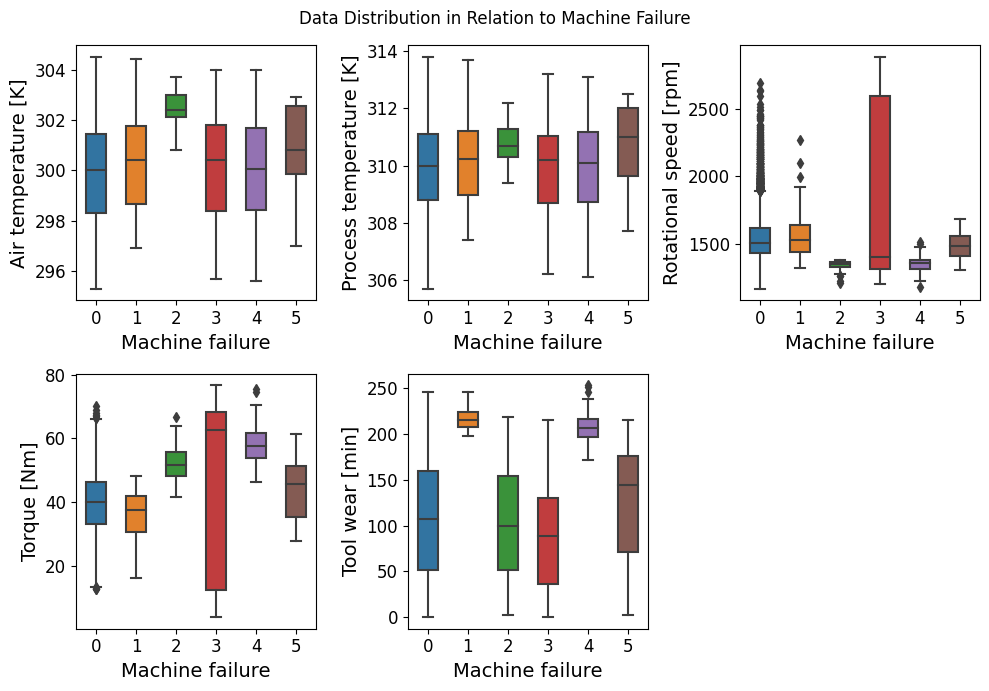

In [14]:
plt.figure(figsize=(10, 7))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data, x=label, y=col, width=0.5)
plt.suptitle("Data Distribution in Relation to Machine Failure")
plt.tight_layout()
plt.show()

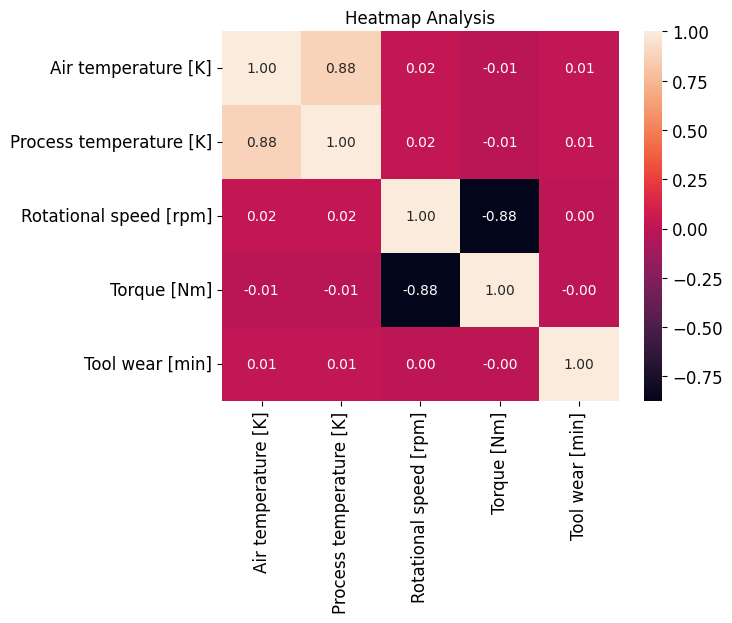

In [15]:
#plt.figure(figsize = (6,6))
# , square = True, annot = True, cmap = 'Blues', linewidths = 0.5)
sns.heatmap(data[num_cols].corr(), annot=True, fmt=".2f")
plt.title("Heatmap Analysis")
plt.show()

In [16]:
data[num_cols].corr()


Air temperature [K]  Process temperature [K]  \
Air temperature [K]                 1.000000                 0.876107   
Process temperature [K]             0.876107                 1.000000   
Rotational speed [rpm]              0.022670                 0.019277   
Torque [Nm]                        -0.013778                -0.014061   
Tool wear [min]                     0.013853                 0.013488   

                         Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  
Air temperature [K]                    0.022670    -0.013778         0.013853  
Process temperature [K]                0.019277    -0.014061         0.013488  
Rotational speed [rpm]                 1.000000    -0.875027         0.000223  
Torque [Nm]                           -0.875027     1.000000        -0.003093  
Tool wear [min]                        0.000223    -0.003093         1.000000

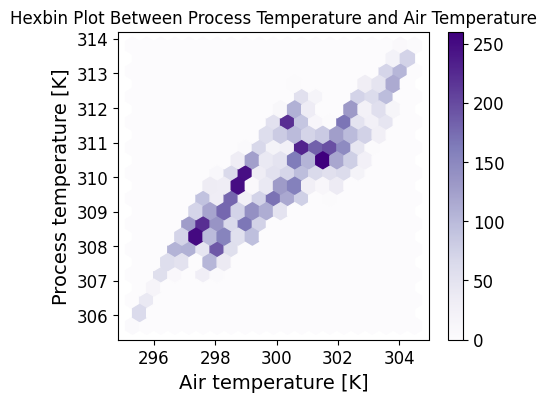

In [17]:
data.plot.hexbin(x='Air temperature [K]', y='Process temperature [K]',
                 gridsize=20, cmap='Purples', figsize=(5, 4))
plt.title("Hexbin Plot Between Process Temperature and Air Temperature")
plt.show()

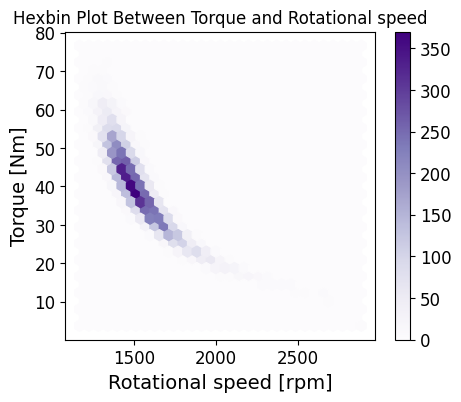

In [18]:
data.plot.hexbin(x='Rotational speed [rpm]', y='Torque [Nm]',
                 gridsize=30, cmap='Purples', figsize=(5, 4))
plt.title("Hexbin Plot Between Torque and Rotational speed")
plt.show()

Machine failure     0   1    2   3   4   5    All
Type                                             
H                 979   6    8   4   2   4   1003
L                5757  24   68  51  87  13   6000
M                2916  12   30  28   9   2   2997
All              9652  42  106  83  98  19  10000


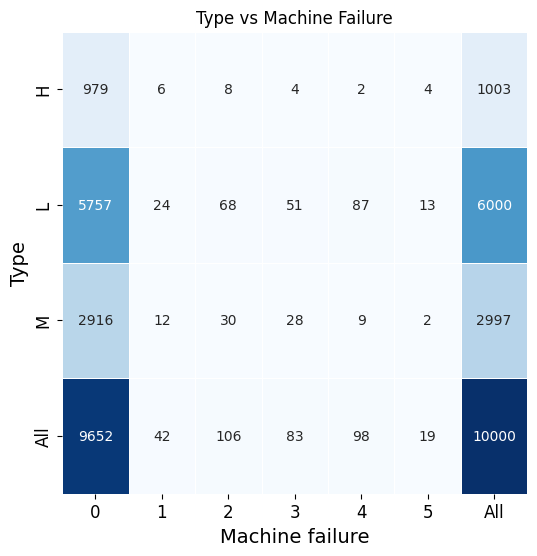

In [19]:
type_machine_failure = data[['Type', 'Machine failure']].pivot_table(index='Type', columns='Machine failure', aggfunc= lambda x: len(x), margins = True)
print(type_machine_failure)
plt.figure(figsize=(6,6))
sns.heatmap(type_machine_failure, annot=True, fmt='g', cmap='Blues', cbar=False, linewidths=0.5)
plt.title("Type vs Machine Failure")
plt.show()

In [20]:
from pycaret.classification import *
s = setup(data, target = 'Machine failure', session_id = 42, data_split_stratify=True)

In [21]:
best_model = compare_models(sort = 'AUC')

Initiated  . . . . . . . . . . . . . . . . . .              13:29:36
Status     . . . . . . . . . . . . . . . . . .  Loading Dependencies
Estimator  . . . . . . . . . . . . . . . . . .     Compiling Library

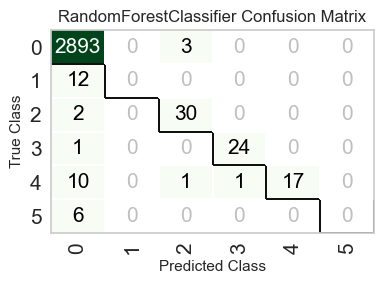

In [22]:
plt.figure(figsize = (4,3))
plot_model(best_model, plot = 'confusion_matrix')

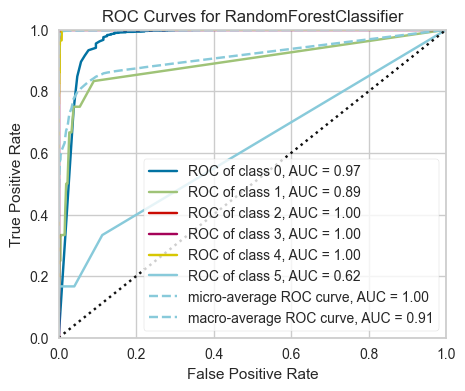

In [23]:
plt.figure(figsize = (5,4))
plot_model(best_model, plot = 'auc')

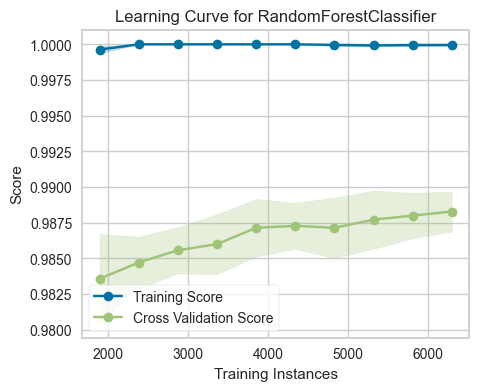

In [24]:
plt.figure(figsize = (5, 4))
plot_model(best_model, plot = 'learning')

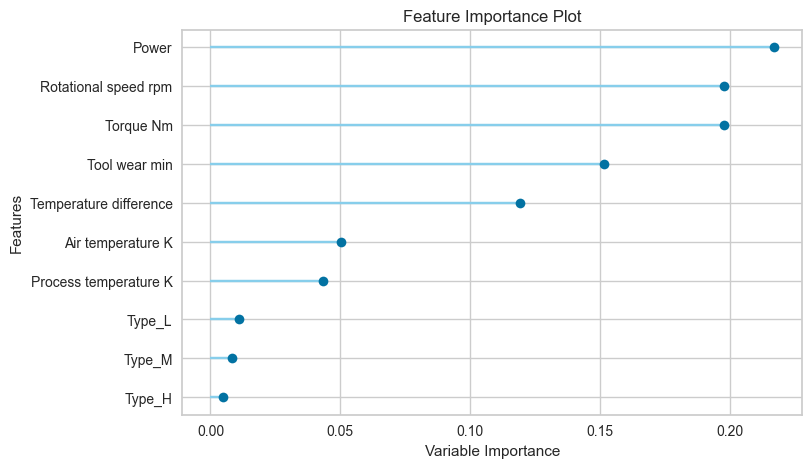

In [25]:
plot_model(best_model, plot = 'feature')

In [26]:
save_model(best_model, "ai4i2020_pycaret_model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Air temperature [K]',
                                              'Process temperature [K]',
                                              'Rotational speed [rpm]',
                                              'Torque [Nm]', 'Tool wear [min]',
                                              'Power',
                                              'Temperature difference'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=n...
                  RandomForestClassif

In [27]:
#plot_model(best_model, plot = 'calibration') # NOT WORKING

In [28]:
calibrated_model = calibrate_model(best_model)

Initiated  . . . . . . . . . . . . . . . . . .              13:30:44
Status     . . . . . . . . . . . . . . . . . .  Loading Dependencies
Estimator  . . . . . . . . . . . . . . . . . .     Compiling Library

In [29]:
#plot_model(calibrated_model, plot = 'calibration') # NOT WORKING

In [30]:
automl()

CalibratedClassifierCV(cv=5, ensemble=True,
                       estimator=RandomForestClassifier(bootstrap=True,
                                                        ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='sqrt',
                                                        max_leaf_nodes=None,
                                                        max_samples=None,
                                                        min_impurity_decrease=0.0,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        monotonic_cst=None,
                                                        n_estimators=100,
                                                        n_jobs=-1,
                                                        oob_score=False,
                                                        random_state=42,
                                                        verbose=0,
                                                        warm_start=False),
                       method='sigmoid', n_jobs=None)

In [31]:
#create_app(best_model)